In [1]:
# Linear Discriminant Analysis (LDA)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
!curl https://raw.githubusercontent.com/muke888/UdemyMachineLearning/master/Part9-2.Dimensionality%20Reduction%20-%20LDA%20-supervised/Wine.csv -o Wine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11462  100 11462    0     0  81871      0 --:--:-- --:--:-- --:--:-- 81871


In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

dataset.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train[:3]

array([[1.369e+01, 3.260e+00, 2.540e+00, 2.000e+01, 1.070e+02, 1.830e+00,
        5.600e-01, 5.000e-01, 8.000e-01, 5.880e+00, 9.600e-01, 1.820e+00,
        6.800e+02],
       [1.269e+01, 1.530e+00, 2.260e+00, 2.070e+01, 8.000e+01, 1.380e+00,
        1.460e+00, 5.800e-01, 1.620e+00, 3.050e+00, 9.600e-01, 2.060e+00,
        4.950e+02],
       [1.162e+01, 1.990e+00, 2.280e+00, 1.800e+01, 9.800e+01, 3.020e+00,
        2.260e+00, 1.700e-01, 1.350e+00, 3.250e+00, 1.160e+00, 2.960e+00,
        3.450e+02]])

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:3]

array([[ 0.87668336,  0.79842885,  0.64412971,  0.12974277,  0.48853231,
        -0.70326216, -1.42846826,  1.0724566 , -1.36820277,  0.35193216,
         0.0290166 , -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858,  0.33380024, -1.41302392,
        -1.44153145, -0.5029981 ,  1.70109989,  0.02366802, -0.84114577,
         0.0290166 , -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, -0.45327855, -0.14531976,
         1.24904997,  0.31964204, -1.52069698, -0.4346309 , -0.75682931,
         0.90197362,  0.51900537, -1.31256499]])

In [5]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
X_train[:3]
# The difference to PCA is that we use y-train to fit the model

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453]])

In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:5]

array([1, 3, 2, 1, 2])

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm 
#14 predictions correct for 1, 16 correct for 2, 6 correct for 1

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [9]:
print("Accuracy of:", (14+16+6)/(14+16+6))

Accuracy of: 1.0


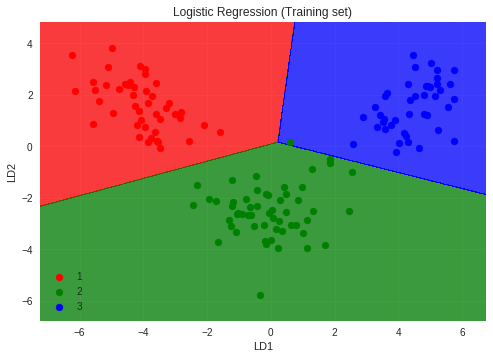

In [10]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

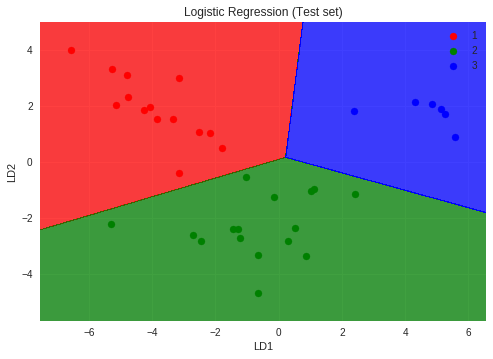

In [11]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()